In [1]:
import numpy as np  # Nhập thư viện numpy để xử lý mảng và toán học

# Định nghĩa lớp SVM
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        # Khởi tạo các tham số cho mô hình
        self.lr = learning_rate  # Tốc độ học
        self.lambda_param = lambda_param  # Tham số điều chỉnh (regularization)
        self.n_iters = n_iters  # Số vòng lặp huấn luyện
        self.w = None  # Trọng số (weights)
        self.b = None  # Hệ số chặn (bias)

    def fit(self, X, y):  # Hàm huấn luyện mô hình
        n_samples, n_features = X.shape  # Lấy số mẫu và số đặc trưng

        y_ = np.where(y <= 0, -1, 1)  # Chuyển đổi nhãn về -1 và 1

        # Khởi tạo trọng số và hệ số chặn
        self.w = np.zeros(n_features)  # Trọng số khởi tạo là mảng 0
        self.b = 0  # Hệ số chặn khởi tạo là 0

        # Vòng lặp huấn luyện
        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Kiểm tra điều kiện SVM
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # Nếu điểm nằm đúng phía của đường phân cách
                    self.w -= self.lr * (self.lambda_param * self.w)  # Cập nhật trọng số
                else:
                    # Nếu điểm không nằm đúng phía
                    self.w -= self.lr * (self.lambda_param * self.w - np.dot(x_i, y_[idx]))  # Cập nhật trọng số
                    self.b -= self.lr * y_[idx]  # Cập nhật hệ số chặn

            # Tính toán độ thay đổi trọng số
            weight_change = np.linalg.norm(self.w)  # Lấy độ lớn của vector trọng số

            # Kiểm tra điều kiện dừng
            if weight_change < 1e-5:  # Nếu thay đổi trọng số nhỏ hơn ngưỡng
                print(f"Đạt được hội tụ tại vòng lặp {i}")
                break  # Dừng vòng lặp nếu hội tụ

    def predict(self, X):  # Hàm dự đoán nhãn
        approx = np.dot(X, self.w) - self.b  # Tính toán giá trị dự đoán
        return np.sign(approx)  # Trả về dấu của giá trị dự đoán



In [2]:
# Hàm tính độ chính xác
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)  # Tính tỷ lệ đúng
    return accuracy

# Hàm vẽ đồ thị cho SVM
def visualize_svm():
    def get_hyperplane_value(x_value, w, b, offset):  # Hàm tính giá trị hyperplane
        return (-w[0] * x_value + b + offset) / w[1]  # Công thức cho hyperplane

    fig = plt.figure()  # Tạo một figure mới
    ax = fig.add_subplot(1, 1, 1)  # Thêm một subplot vào figure
    plt.scatter(X[:, 0], X[:, 1], c=y)  # Vẽ các điểm dữ liệu

    # Tính toán các giá trị cho hyperplane
    x_min = np.amin(X[:, 0])  # Giá trị nhỏ nhất của trục x
    x_max = np.amax(X[:, 0])  # Giá trị lớn nhất của trục x

    # Tính toán các giá trị cho các đường hyperplane
    y_at_x_min = get_hyperplane_value(x_min, clf.w, clf.b, 0)
    y_at_x_max = get_hyperplane_value(x_max, clf.w, clf.b, 0)

    y_at_x_min_m1 = get_hyperplane_value(x_min, clf.w, clf.b, -1)  # Đường biên
    y_at_x_max_m1 = get_hyperplane_value(x_max, clf.w, clf.b, -1)

    y_at_x_min_m2 = get_hyperplane_value(x_min, clf.w, clf.b, 1)
    y_at_x_max_m2 = get_hyperplane_value(x_max, clf.w, clf.b, 1)

    # Vẽ các đường hyperplane
    ax.plot([x_min, x_max], [y_at_x_min, y_at_x_max], "y--")
    ax.plot([x_min, x_max], [y_at_x_min_m1, y_at_x_max_m1], "k")
    ax.plot([x_min, x_max], [y_at_x_min_m2, y_at_x_max_m2], "k")

    y_min = np.amin(X[:, 1])  # Giá trị nhỏ nhất của trục y
    y_max = np.amax(X[:, 1])  # Giá trị lớn nhất của trục y
    ax.set_ylim([y_min - 3, y_max + 3])  # Thiết lập giới hạn cho trục y

    plt.show()  # Hiển thị đồ thị

SVM classification accuracy 1.0


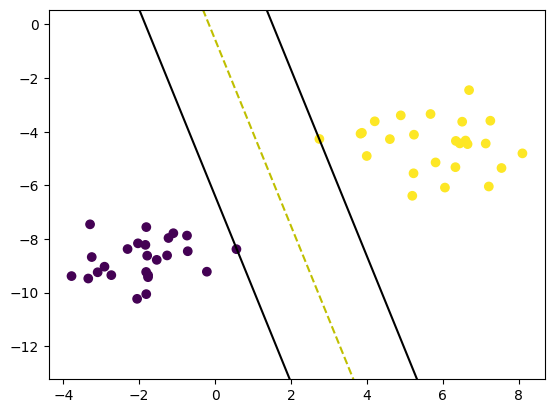

In [3]:
# Nhập các thư viện cần thiết
from sklearn.model_selection import train_test_split  # Để chia dữ liệu thành tập huấn luyện và kiểm tra
from sklearn import datasets  # Để tạo dữ liệu mẫu
import matplotlib.pyplot as plt  # Để vẽ đồ thị

# Tạo dữ liệu mẫu
X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)  # Chuyển đổi nhãn về -1 và 1

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

clf = SVM()  # Khởi tạo mô hình SVM
clf.fit(X_train, y_train)  # Huấn luyện mô hình trên tập huấn luyện
predictions = clf.predict(X_test)  # Dự đoán trên tập kiểm tra

print("SVM classification accuracy", accuracy(y_test, predictions))  # In ra độ chính xác

visualize_svm()  # Gọi hàm để vẽ đồ thị
